In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Load data
file_path = "GBM_rawdata.csv"
df = pd.read_csv(file_path, index_col=False)

#Print data dimensions
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 130
Number of columns: 113


In [4]:
#Remove indexing axis
df = df.drop(df.columns[0:9],axis=1)
print(df)

     IL13RA1  IL13RA2     IL4     IL4R   NOTCH1    TOP2A      CD44   PTPRC  \
0    19.5852  13.1780  0.0927   5.7420  15.6495  21.0322   31.3011  9.4006   
1    22.9763   8.4770  0.0272   8.0570   7.8530   4.0350   40.0156  5.8875   
2    35.0012  41.5385  0.2085   5.6426  12.1505  10.6814   69.0817  6.2170   
3    33.6178   8.8560  0.4084   4.1376  21.9929   9.7775  100.1127  3.1487   
4    46.0934   3.9341  0.0000  15.1554   2.6638  10.5117   85.1749  8.3006   
..       ...      ...     ...      ...      ...      ...       ...     ...   
125  38.4513  10.1236  0.0000   3.6053  13.7309   5.5324  172.0580  4.1519   
126  15.1648   0.6714  0.2816   2.6259  17.1829  24.9982   59.1391  1.8731   
127  22.8645   4.7192  0.0450   4.6396  14.7422  22.5693   41.3973  7.0157   
128  41.0477   1.1404  0.0276   7.6899   8.3806   3.6044   40.3480  7.5153   
129   8.1690  17.4712  0.0882   2.6843   8.8259  22.6756   48.1443  2.1485   

         CDK4   HNRNPU  ...      PDPN     AGRN    FBN3   SEC24D

In [5]:
#Expression normalization
#min_values = df.min(axis=0)
#max_values = df.max(axis=0)
#normalized_data = (df-min_values)/(max_values-min_values)
normalized_data = np.log1p(df)


In [6]:
normalized_data = df.to_numpy()
normalized_data = np.log1p(normalized_data)
normalized_data

array([[3.02457237, 2.65169147, 0.0886517 , ..., 3.03080497, 2.28757297,
        2.26240872],
       [3.17706584, 2.24886781, 0.02683665, ..., 2.63034809, 2.01049331,
        1.90514768],
       [3.58355227, 3.75040955, 0.18937992, ..., 3.07666689, 2.07926653,
        1.89217779],
       ...,
       [3.172392  , 1.74382894, 0.04401689, ..., 2.56782982, 2.34262278,
        1.59121284],
       [3.73880469, 0.76099273, 0.02722599, ..., 3.04927304, 1.96659474,
        1.84932058],
       [2.21582823, 2.91621276, 0.08452496, ..., 2.1631506 , 2.9733026 ,
        1.4465189 ]])

In [7]:
#Obtain covariance matrix
cov = np.cov(normalized_data, rowvar=False)
cov

array([[ 0.27556726,  0.11205934, -0.00635704, ...,  0.21150863,
        -0.05828883,  0.18737006],
       [ 0.11205934,  1.23888525, -0.01002864, ...,  0.11580838,
        -0.0439903 ,  0.05691361],
       [-0.00635704, -0.01002864,  0.00808859, ..., -0.00572969,
         0.00403269, -0.00164567],
       ...,
       [ 0.21150863,  0.11580838, -0.00572969, ...,  0.34264473,
        -0.0263765 ,  0.27887794],
       [-0.05828883, -0.0439903 ,  0.00403269, ..., -0.0263765 ,
         0.12594095, -0.00935821],
       [ 0.18737006,  0.05691361, -0.00164567, ...,  0.27887794,
        -0.00935821,  0.30167232]])

In [9]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
#[::-1]
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#Take the first two eigenvectors
principal_components = sorted_eigenvectors[:, :3]
#print(principal_components)

print(sorted_eigenvalues)

[6.09830386e+00 2.80208370e+00 2.22982111e+00 1.89203260e+00
 1.70147623e+00 1.19074000e+00 9.16689288e-01 8.88730674e-01
 8.44952741e-01 7.06817879e-01 5.87743670e-01 5.20051119e-01
 5.00013540e-01 4.43240464e-01 4.01300656e-01 3.63946546e-01
 3.26053792e-01 2.90983088e-01 2.64348292e-01 2.43205943e-01
 2.17490230e-01 2.05915658e-01 1.91834597e-01 1.78982092e-01
 1.62322574e-01 1.55625548e-01 1.45715238e-01 1.39232981e-01
 1.34006847e-01 1.21806622e-01 1.15173732e-01 1.08550210e-01
 1.02661947e-01 9.03671289e-02 8.15140381e-02 7.85072272e-02
 7.44555634e-02 7.39282278e-02 6.50526431e-02 6.13936682e-02
 5.95097918e-02 5.62082570e-02 5.20391965e-02 5.04028150e-02
 4.64429361e-02 4.28607955e-02 4.08188185e-02 3.87446022e-02
 3.54150133e-02 3.30434044e-02 3.19250450e-02 2.98973334e-02
 2.81754335e-02 2.62210637e-02 2.51752154e-02 2.33312424e-02
 2.25319476e-02 2.13537005e-02 2.01006932e-02 1.86517723e-02
 1.72657741e-02 1.70323190e-02 1.53948480e-02 1.51670706e-02
 1.46697033e-02 1.413160

In [13]:
first_principal_component = eigenvectors[:,0]
for i, weight in enumerate(first_principal_component):
    print("Gene", i, weight)

Gene 0 -0.027498174348197478
Gene 1 -0.014050508705309925
Gene 2 -0.3034834757955312
Gene 3 -0.0660809549785748
Gene 4 0.0027927790924324736
Gene 5 0.05237300176669708
Gene 6 0.025748046956440906
Gene 7 -0.0850366182731398
Gene 8 -0.0005548946675287721
Gene 9 -0.22139881403299772
Gene 10 -0.014818515249087623
Gene 11 0.0034009238919039536
Gene 12 0.022716222356773945
Gene 13 0.043733292089894765
Gene 14 -0.025092587532256183
Gene 15 -0.0650966264101619
Gene 16 -0.10297444535156387
Gene 17 0.08609478301397938
Gene 18 -0.0465885965843565
Gene 19 0.08632599813792671
Gene 20 0.050107180788516434
Gene 21 0.10425082547687341
Gene 22 -0.018236277019083064
Gene 23 0.09301467559336352
Gene 24 0.007522387616737625
Gene 25 0.10382991008221806
Gene 26 0.12852323263314358
Gene 27 -0.11919118476422474
Gene 28 0.008464995954287423
Gene 29 0.0018305945171171768
Gene 30 -0.13769490649836974
Gene 31 0.10224624692326838
Gene 32 0.005084368086985534
Gene 33 0.0041071002327520405
Gene 34 -0.153931583754817

25


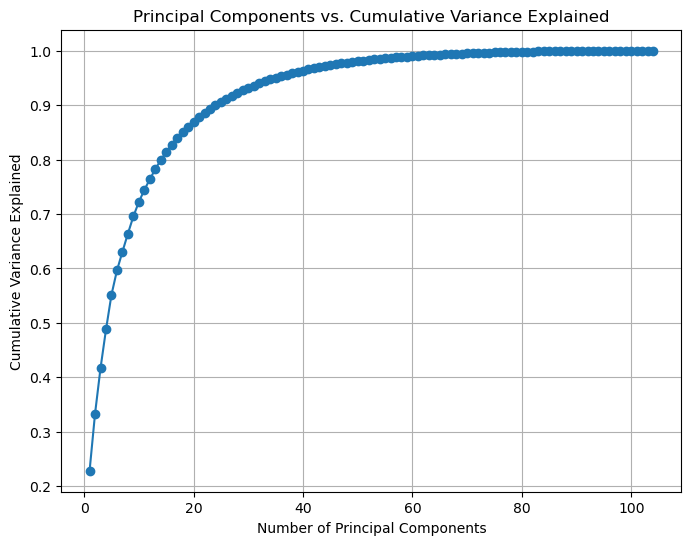

In [86]:
#Need to plot cumulative variance explained by principal components
cumulative_variance_explained = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(cumulative_variance_explained)

dim_required = np.argmax(cumulative_variance >= 0.9) + 1
print(dim_required)

#Also create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Principal Components vs. Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

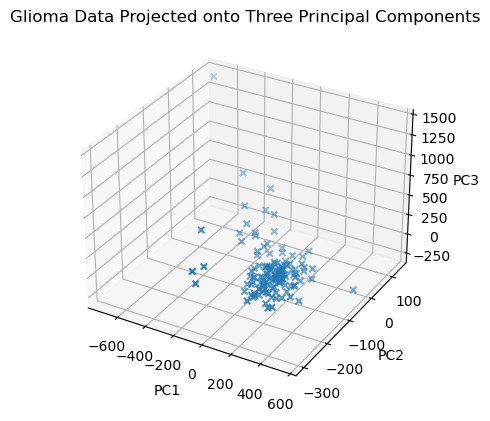

In [87]:
#Setup projected data
projected_data = np.dot(df.values, principal_components)

#Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Scatter plot of data projected onto three principal components
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], marker='x')

#Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Glioma Data Projected onto Three Principal Components')
plt.show()

In [88]:
#Extract features
#Loading coefficients

#print(eigenvalues)
loadings = principal_components.T * np.sqrt(eigenvalues)
loadings_df = pd.DataFrame(loadings, columns=df.columns)
print("Loading Coefficients of Principal Components:")
print(loadings_df)

Loading Coefficients of Principal Components:
    IL13RA1   IL13RA2       IL4      IL4R    NOTCH1     TOP2A      CD44  \
0  0.002181  0.001386 -0.000036  0.003667 -0.003021 -0.005684  0.006496   
1 -0.000380  0.002229  0.000099 -0.001836 -0.002781 -0.003555 -0.002949   
2  0.000371 -0.000578 -0.000231  0.002557 -0.000838  0.002003 -0.001794   

      PTPRC      CDK4    HNRNPU  ...      PDPN      AGRN      FBN3    SEC24D  \
0  0.005835 -0.007924 -0.001505  ...  0.131363 -0.050278 -0.111121  0.077868   
1  0.000770  0.002328 -0.002487  ... -0.042527 -0.167811 -0.097821 -0.102922   
2  0.004669  0.014214 -0.001416  ... -0.137893  0.000437  0.105195  0.031159   

      KLRK1       HK2      TFEC     EVI2B     MED20    SAMSN1  
0 -0.016562  0.115524  0.132513  0.258833 -0.083120  0.410459  
1 -0.011768 -0.209825  0.063988  0.150426  0.012484  0.134630  
2  0.032373  0.117838  0.144807  0.231505  0.052782  0.398478  

[3 rows x 104 columns]


In [95]:
#Aggregate loading coefficients
aggregated_loadings = loadings_df.abs().sum(axis=0)

#Rank genes
ranked_genes = aggregated_loadings.sort_values(ascending=False)

# Assuming top_genes is your Series containing the top genes
table = top_genes.reset_index()
table.columns = ["Gene", "Aggregated Loading Coefficient"]

# Print the table
print("Top Genes Contributing to Patient Mortality:")
print(tabulate(table, headers="keys", tablefmt="pretty"))

Top Genes Contributing to Patient Mortality:
+----+----------+--------------------------------+
|    |   Gene   | Aggregated Loading Coefficient |
+----+----------+--------------------------------+
| 0  |  SAMSN1  |       0.9435664465512865       |
| 1  |  EVI2B   |       0.640764057674171        |
| 2  |   HK2    |       0.4431864979003506       |
| 3  |  LOXL2   |       0.3475233156912739       |
| 4  |   TFEC   |       0.3413091948473772       |
| 5  |   FBN3   |      0.31413637995252924       |
| 6  |   PDPN   |       0.3117833108686082       |
| 7  |   AGRN   |      0.21852553431307375       |
| 8  |  SEC24D  |      0.21194891782769398       |
| 9  |  HAVCR2  |      0.18201945899745992       |
| 10 |  SHOX2   |      0.14924303264898092       |
| 11 |  MED20   |      0.14838569839542753       |
| 12 | HLA-DPA1 |       0.1464192664938566       |
| 13 |   MYOF   |      0.11562040334335964       |
| 14 |   LPL    |      0.11463885578460908       |
| 15 |  SPARC   |      0.111695351202

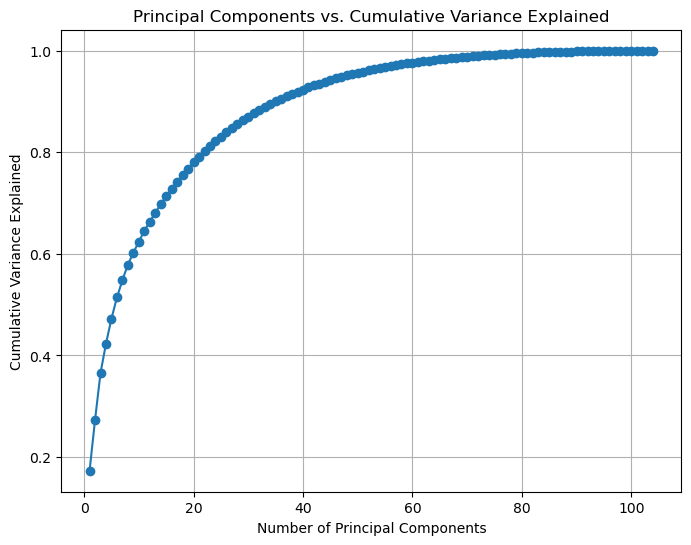

In [93]:
####VERIFICATION STEP
#Verify graph
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


#Normalize the gene expression data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

#Fit PCA
pca = PCA()
pca.fit(df_normalized)
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

#Plot the cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', linestyle='-')
plt.title('Principal Components vs. Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()